In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\parkh\OneDrive\Desktop\HateSpeech\TwitterHate.csv")



In [2]:
df = data.copy()

In [3]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
X = df['tweet']
y = df['label']

In [6]:
import re
special_char_rows = df[df['tweet'].str.contains(r'[^A-Za-z0-9\s]', regex=True)]
special_char_rows


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df['tweet'] = df['tweet'].apply(remove_special_characters)
no_special_char_rows = df[~df['tweet'].str.contains(r'[^A-Za-z0-9\s]', regex=True)]
no_special_char_rows
df['preprocessed_text'] = df['tweet'].str.lower()



In [8]:
df['preprocessed_text']

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957                             ate user isz that youuu 
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                      thank you user for you follow  
Name: preprocessed_text, Length: 31962, dtype: object

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import warnings
from nltk.corpus import stopwords

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

In [11]:
from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 

warnings.filterwarnings('ignore')
np.random.seed(0)

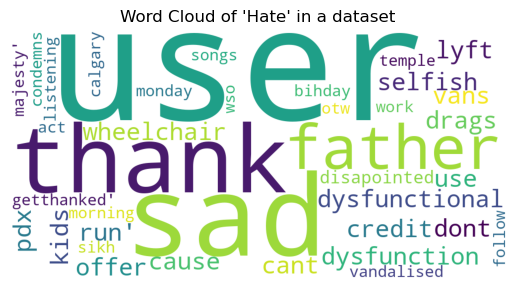

In [17]:
np.random.seed(0)

text = df['tweet'].values
wordcloud = WordCloud(width=1000, height=500, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Hate' in a dataset")
plt.show()

In [23]:
example=df['tweet'][29764]
example

'very excited to be back again for second year in a row theme is youth empowerment ypttl '

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 32)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from time import time
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}

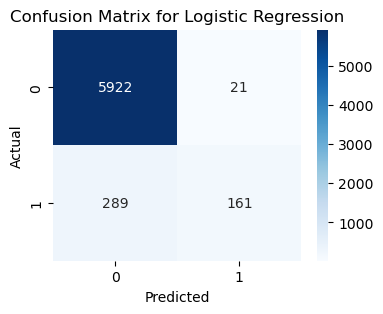

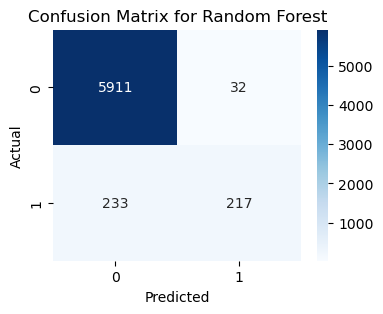

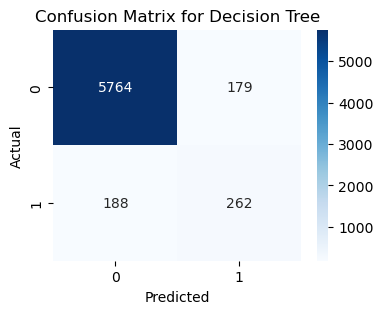

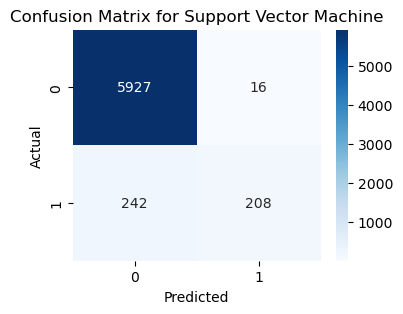

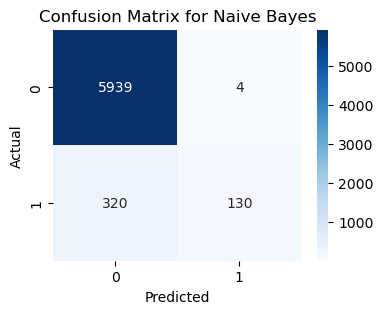

Results for Logistic Regression:
Accuracy: 0.9515094634756766
F1 Score: 0.9417628588669869
Precision: 0.9486230340545595
Recall: 0.9515094634756766
Time Taken: 0.9521348476409912


Results for Random Forest:
Accuracy: 0.9585484123259815
F1 Score: 0.9529332929733118
Precision: 0.9557001772708502
Recall: 0.9585484123259815
Time Taken: 79.52030205726624


Results for Decision Tree:
Accuracy: 0.9425934615986234
F1 Score: 0.9423252470663445
Precision: 0.9420665122742153
Recall: 0.9425934615986234
Time Taken: 8.411476373672485


Results for Support Vector Machine:
Accuracy: 0.9596433599249179
F1 Score: 0.9532538466240832
Precision: 0.9585050463431561
Recall: 0.9596433599249179
Time Taken: 63.93921971321106


Results for Naive Bayes:
Accuracy: 0.9493195682778038
F1 Score: 0.9362643271641391
Precision: 0.9503712028205932
Recall: 0.9493195682778038
Time Taken: 0.031188249588012695




In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from time import time

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time()
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    time_taken = time() - start_time
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'Time Taken': time_taken
    }
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
    print("\n")


In [15]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Time Taken: {metrics['Time Taken']:.4f} seconds")



Model: Logistic Regression
Accuracy: 0.9515
F1 Score: 0.9418
Confusion Matrix:
[[5922   21]
 [ 289  161]]
Time Taken: 0.9521 seconds

Model: Random Forest
Accuracy: 0.9585
F1 Score: 0.9529
Confusion Matrix:
[[5911   32]
 [ 233  217]]
Time Taken: 79.5203 seconds

Model: Decision Tree
Accuracy: 0.9426
F1 Score: 0.9423
Confusion Matrix:
[[5764  179]
 [ 188  262]]
Time Taken: 8.4115 seconds

Model: Support Vector Machine
Accuracy: 0.9596
F1 Score: 0.9533
Confusion Matrix:
[[5927   16]
 [ 242  208]]
Time Taken: 63.9392 seconds

Model: Naive Bayes
Accuracy: 0.9493
F1 Score: 0.9363
Confusion Matrix:
[[5939    4]
 [ 320  130]]
Time Taken: 0.0312 seconds


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [18]:
df

,id,label,tweet,preprocessed_text
0,1,0,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,model i love u take with u all the time in u...,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate user isz that youuu,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...,user sikh temple vandalised in in calgary wso ...


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode the target labels (convert to string first)
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'].astype(str))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['preprocessed_text'], df['label'], test_size=0.2, random_state=42
)

# Tokenization parameters
max_words = 10000  # Vocabulary size
max_len = 150      # Max sequence length

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Labels as arrays
y_train = y_train.values
y_test = y_test.values


In [20]:
# Tokenization
max_words = 10000  # Maximum vocabulary size
max_len = 150      # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

# Fit the tokenizer on training text
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Ensure all data is in NumPy format
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes for verification
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)


X_train shape: (25569, 150)
X_test shape: (6393, 150)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# CNN layers
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numeric values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform (not fit_transform) to keep consistency

# Convert to float32 (or int32) for model compatibility
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [23]:
# Train the model using the padded sequences
cnn_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
800/800 [==============================] - 41s 51ms/step - loss: 0.1729 - accuracy: 0.9476 - val_loss: 0.1273 - val_accuracy: 0.9550
Epoch 2/10
800/800 [==============================] - 43s 53ms/step - loss: 0.0734 - accuracy: 0.9752 - val_loss: 0.1233 - val_accuracy: 0.9601
Epoch 3/10
800/800 [==============================] - 34s 43ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.1612 - val_accuracy: 0.9557
Epoch 4/10
800/800 [==============================] - 32s 40ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.2015 - val_accuracy: 0.9504
Epoch 5/10
800/800 [==============================] - 38s 47ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.2907 - val_accuracy: 0.9545
Epoch 6/10
800/800 [==============================] - 32s 40ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.3088 - val_accuracy: 0.9554
Epoch 7/10
800/800 [==============================] - 34s 42ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.3943 - val_accuracy:

In [24]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")


200/200 [==============================] - 1s 6ms/step - loss: 0.4003 - accuracy: 0.9551
CNN Accuracy: 95.51%


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
lstm_model.add(LSTM(128, return_sequences=False))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
800/800 [==============================] - 87s 106ms/step - loss: 0.2758 - accuracy: 0.9293 - val_loss: 0.2595 - val_accuracy: 0.9287
Epoch 2/10
800/800 [==============================] - 91s 114ms/step - loss: 0.2666 - accuracy: 0.9301 - val_loss: 0.2584 - val_accuracy: 0.9287
Epoch 3/10
800/800 [==============================] - 100s 124ms/step - loss: 0.2638 - accuracy: 0.9301 - val_loss: 0.2576 - val_accuracy: 0.9287
Epoch 4/10
800/800 [==============================] - 87s 109ms/step - loss: 0.2645 - accuracy: 0.9301 - val_loss: 0.2574 - val_accuracy: 0.9287
Epoch 5/10
800/800 [==============================] - 103s 129ms/step - loss: 0.2623 - accuracy: 0.9301 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoch 6/10
800/800 [==============================] - 206s 258ms/step - loss: 0.2610 - accuracy: 0.9301 - val_loss: 0.2572 - val_accuracy: 0.9287
Epoch 7/10
800/800 [==============================] - 190s 238ms/step - loss: 0.2590 - accuracy: 0.9301 - val_loss: 0.2574 - va

In [30]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
800/800 [==============================] - 137s 168ms/step - loss: 0.1753 - accuracy: 0.9475 - val_loss: 0.1188 - val_accuracy: 0.9595
Epoch 2/10
800/800 [==============================] - 138s 172ms/step - loss: 0.0825 - accuracy: 0.9727 - val_loss: 0.1103 - val_accuracy: 0.9611
Epoch 3/10
800/800 [==============================] - 138s 173ms/step - loss: 0.0519 - accuracy: 0.9827 - val_loss: 0.1308 - val_accuracy: 0.9573
Epoch 4/10
800/800 [==============================] - 136s 170ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.2178 - val_accuracy: 0.9589
Epoch 5/10
800/800 [==============================] - 137s 172ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.2132 - val_accuracy: 0.9578
Epoch 6/10
800/800 [==============================] - 140s 175ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.2389 - val_accuracy: 0.9567
Epoch 7/10
800/800 [==============================] - 137s 171ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.2965 -

In [26]:
# Evaluate the CNN model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")


200/200 [==============================] - 6s 30ms/step - loss: 0.2572 - accuracy: 0.9287
LSTM Accuracy: 92.87%


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Concatenate, Dense, Dropout

# Input
input_layer = Input(shape=(max_len,))

# Shared Embedding layer
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# LSTM Branch
lstm = LSTM(64, return_sequences=True)(embedding)
lstm_pool = GlobalMaxPooling1D()(lstm)

# CNN Branch
conv = Conv1D(64, kernel_size=3, activation='relu')(embedding)
conv_pool = GlobalMaxPooling1D()(conv)

# Merge both
merged = Concatenate()([lstm_pool, conv_pool])
merged = Dropout(0.5)(merged)
output = Dense(1, activation='sigmoid')(merged)

# Final model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 150, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 150, 64)              49408     ['embedding_2[0][0]']         
                                                                                                  
 conv1d_1 (Conv1D)           (None, 148, 64)              24640     ['embedding_2[0][0]']         
                                                                                              

In [28]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
800/800 [==============================] - 64s 77ms/step - loss: 0.1816 - accuracy: 0.9440 - val_loss: 0.1193 - val_accuracy: 0.9570
Epoch 2/5
800/800 [==============================] - 66s 83ms/step - loss: 0.0850 - accuracy: 0.9706 - val_loss: 0.1217 - val_accuracy: 0.9590
Epoch 3/5
800/800 [==============================] - 63s 79ms/step - loss: 0.0497 - accuracy: 0.9832 - val_loss: 0.1351 - val_accuracy: 0.9567
Epoch 4/5
800/800 [==============================] - 62s 78ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.1754 - val_accuracy: 0.9585
Epoch 5/5
800/800 [==============================] - 63s 78ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.2045 - val_accuracy: 0.9553


In [29]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Final Training Accuracy: 99.45%
Final Validation Accuracy: 95.53%


In [31]:
# Evaluate the CNN model
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_padded, y_test)
print(f"BI-LSTM Accuracy: {bi_lstm_accuracy * 100:.2f}%")


200/200 [==============================] - 8s 40ms/step - loss: 0.3813 - accuracy: 0.9440
BI-LSTM Accuracy: 94.40%


In [32]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities from each model
lstm_preds = lstm_model.predict(X_test_pad)
bi_lstm_preds = bi_lstm_model.predict(X_test_pad)
cnn_preds = cnn_model.predict(X_test_pad)

# Average predictions
avg_preds = (lstm_preds + bi_lstm_preds + cnn_preds) / 3
final_preds = np.round(avg_preds).astype(int)

# Evaluate
print("Ensemble Accuracy:", accuracy_score(y_test, final_preds))


200/200 [==============================] - 1s 6ms/step
Ensemble Accuracy: 0.9286719849835758
